# Binary classification hands-on

In this hands-on you will try solving a simple classification problem from one of the "dummy" datasets. The task consists of 

1. Loading and exploration of the dataset 
2. Transforming the dataset so the features are usable by the given classification algorithms
3. Training a decision tree model 
4. Evaluation of the model results and its performance
5. (Bonus) Experiment with different algorithm, performance evaluation methods, etc.

In [176]:
# import the data scientist most used packages (you can import additional when needed)
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [177]:
# dataset_load
df = sns.load_dataset("titanic")

* Pclass Passenger Class (1 = 1st; 2 = 2nd; 3 = 3rd)
* survival Survival (0 = No; 1 = Yes)
*  name Name
* sex Sex
* age Age
* sibsp Number of Siblings/Spouses Aboard
* parch Number of Parents/Children Aboard
* ticket Ticket Number
* fare Passenger Fare (British pound)
* cabin Cabin
* embarked Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)
* boat Lifeboat
* body Body Identification Number
* home.dest Home/Destination

### Dataset exploration (15 min)

The target variable of the dataset is in column **survived**. Skim through the dataset and see which features are numeric, which are categorical, which have missing values etc. Attribute .dtypes of the dataframe can come in handy. Also, try to see which columns contain missing values and what is the percentage of missing value in that column.

In [178]:
# var A
print(df.isna().sum()/len(df) * 100)
# var B
print("#######")
for col in df.columns:
  missing_values = df[col].isna().sum()
  if missing_values > 0:
    print(f"missing values percentage for {col:12}: {missing_values / len(df) *100:.2f}%")
print("#######")
print(df.dtypes)

survived        0.000000
pclass          0.000000
sex             0.000000
age            19.865320
sibsp           0.000000
parch           0.000000
fare            0.000000
embarked        0.224467
class           0.000000
who             0.000000
adult_male      0.000000
deck           77.216611
embark_town     0.224467
alive           0.000000
alone           0.000000
dtype: float64
#######
missing values percentage for age         : 19.87%
missing values percentage for embarked    : 0.22%
missing values percentage for deck        : 77.22%
missing values percentage for embark_town : 0.22%
#######
survived          int64
pclass            int64
sex              object
age             float64
sibsp             int64
parch             int64
fare            float64
embarked         object
class          category
who              object
adult_male         bool
deck           category
embark_town      object
alive            object
alone              bool
dtype: object


### Dataset visual exploration

Afterwards, make a plot for each of the feature trying to show which of those variables should have predictive power. For numerical features, plot two histograms in one plot (one for target 0 and second for target 1). For categorical, plot one of countplots/catplots/barplots or simple event rate plot (what is the ratio of survived/not-survied for each category.

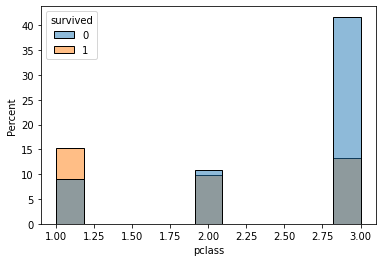

#### sex


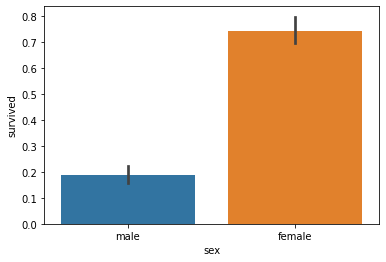

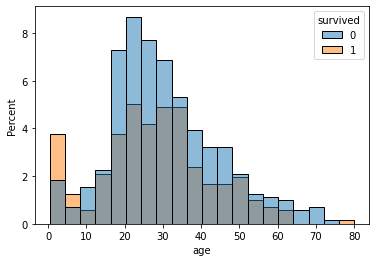

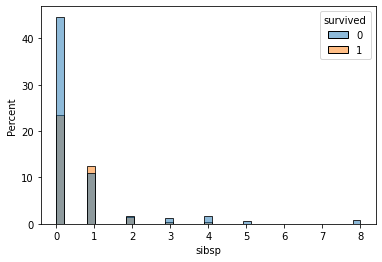

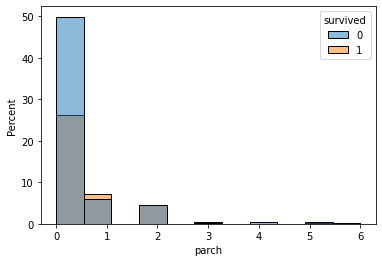

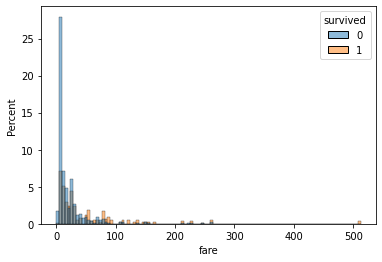

#### embarked


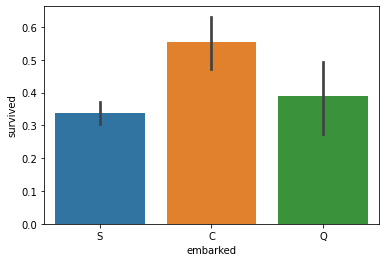

#### class


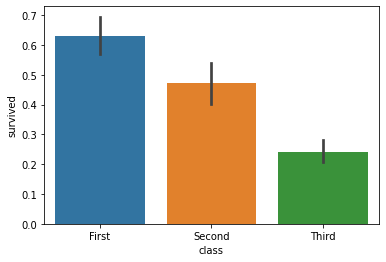

#### who


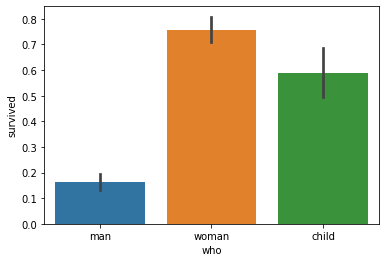

#### adult_male


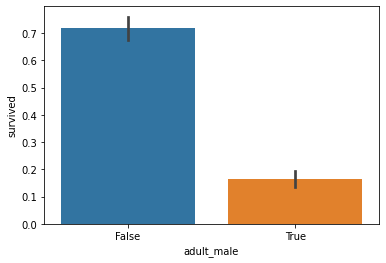

#### deck


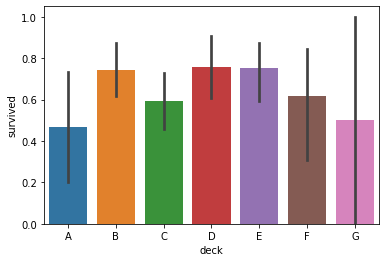

#### embark_town


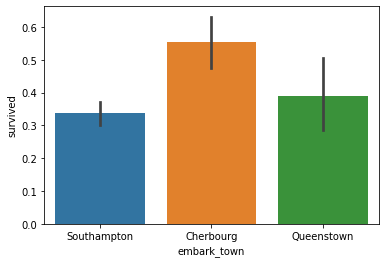

#### alone


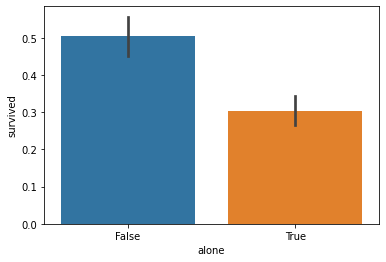

In [179]:
from pickle import encode_long
for col in df.columns:
  if col in ["survived", "alive"]:
    continue
  if df[col].dtype == "object" or df[col].dtype == bool or df[col].dtype == "category":
    print(f"#### {col}")
    sns.barplot(data=df, x = col, y = "survived")
    plt.show()
  else:
    sns.histplot(data= df, x = col, hue = "survived", stat="percent")
    plt.show()

## Prepare the dataset for the classification task

* Delete unnecessary columns
* Deal with missing values
* Dummify categorical variables (pd.get_dummies())

In [181]:
# delete alive
# delete embark
import traceback
try:
  df.drop(columns = ["alive", "adult_male", "embarked", "sex", "class"], inplace = True)
  print("columns deleted")
except:
  print("Columns not existing anymore")
  traceback.print_last()

df["deck"] = df["deck"].astype(str)
df.loc[df["deck"] == "nan", "deck"] = "XNA"

df["alone"] = df["alone"].astype(int)
for who in df["who"].unique():
  print(f'Filling {who} {len(df.loc[(df["who"] == who) & (df["age"].isna()), "age"])}/{(df["who"] == who).sum()} values with age: {df.loc[df["who"] == who, "age"].median()}')
  df.loc[(df["who"] == who) & (df["age"].isna()), "age"] = df.loc[df["who"] == who, "age"].median()

Columns not existing anymore
Filling man 0/537 values with age: 30.0
Filling woman 0/271 values with age: 30.0
Filling child 0/83 values with age: 5.0


Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/pandas/core/indexes/base.py", line 3361, in get_loc
    return self._engine.get_loc(casted_key)
  File "pandas/_libs/index.pyx", line 76, in pandas._libs.index.IndexEngine.get_loc
  File "pandas/_libs/index.pyx", line 108, in pandas._libs.index.IndexEngine.get_loc
  File "pandas/_libs/hashtable_class_helper.pxi", line 5198, in pandas._libs.hashtable.PyObjectHashTable.get_item
  File "pandas/_libs/hashtable_class_helper.pxi", line 5206, in pandas._libs.hashtable.PyObjectHashTable.get_item
KeyError: 'deck'

The above exception was the direct cause of the following exception:

Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py", line 2882, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-175-34fbe5b8dd53>", line 11, in <module>
    df["deck"] = df["deck"].astype(str)
  File "/usr/local/lib/python3.7/dist-p

In [152]:
df = pd.get_dummies(df, prefix=None, prefix_sep='_', columns = ["deck", "embark_town", "who"])
#df
#df.col

In [153]:
df

,survived,pclass,age,sibsp,parch,fare,alone,deck_A,deck_B,deck_C,...,deck_E,deck_F,deck_G,deck_XNA,embark_town_Cherbourg,embark_town_Queenstown,embark_town_Southampton,who_child,who_man,who_woman
0,0,3,22.0,1,0,7.2500,0,0,0,0,...,0,0,0,1,0,0,1,0,1,0
1,1,1,38.0,1,0,71.2833,0,0,0,1,...,0,0,0,0,1,0,0,0,0,1
2,1,3,26.0,0,0,7.9250,1,0,0,0,...,0,0,0,1,0,0,1,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,0,1,...,0,0,0,0,0,0,1,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,0,0,...,0,0,0,1,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,27.0,0,0,13.0000,1,0,0,0,...,0,0,0,1,0,0,1,0,1,0
887,1,1,19.0,0,0,30.0000,1,0,1,0,...,0,0,0,0,0,0,1,0,0,1
888,0,3,30.0,1,2,23.4500,0,0,0,0,...,0,0,0,1,0,0,1,0,0,1
889,1,1,26.0,0,0,30.0000,1,0,0,1,...,0,0,0,0,1,0,0,0,1,0


## Split data to test and train set

* print the resulting ratio of size of train vs whole dataset
* print ratio of survived people in the different dataset options to check that the ratio is similar in both train and test dataset

In [154]:
from sklearn.model_selection import train_test_split

In [155]:
X = df.loc[:, df.columns != 'survived']
y = df["survived"]
X_tr, X_ts, y_tr, y_ts = train_test_split(X, y, test_size=0.33, random_state=0)
print(f"Train ratio: {sum(y_tr)/len(y_tr)}")
print(f"Test ratio: {sum(y_ts)/len(y_ts)}")

Train ratio: 0.3875838926174497
Test ratio: 0.376271186440678


## Train a decision tree model
Fit a decision tree classifier of a reasonable height

In [192]:
from sklearn.tree import DecisionTreeClassifier
import numpy as np
model = DecisionTreeClassifier(max_depth=3)
model.fit(X_tr, y_tr)

DecisionTreeClassifier(max_depth=3)

#### Print the train and test accuracy of the model (number of correctly classified samples / number of samples)
You don't need for loop for this!

In [193]:
y_tr_pred = model.predict(X_tr)
y_ts_pred = model.predict(X_ts)
print(f"Train accuracy: {(y_tr_pred == y_tr).sum()/len(y_tr) * 100:.2f} %")
print(f"Test accuracy: {(y_ts_pred == y_ts).sum()/len(y_ts) * 100:.2f} %")

Train accuracy: 83.56 %
Test accuracy: 82.03 %


### Plot the tree (sklearn.plot_tree() function)
Make the plot pretty and annotated so it can be explained to business.

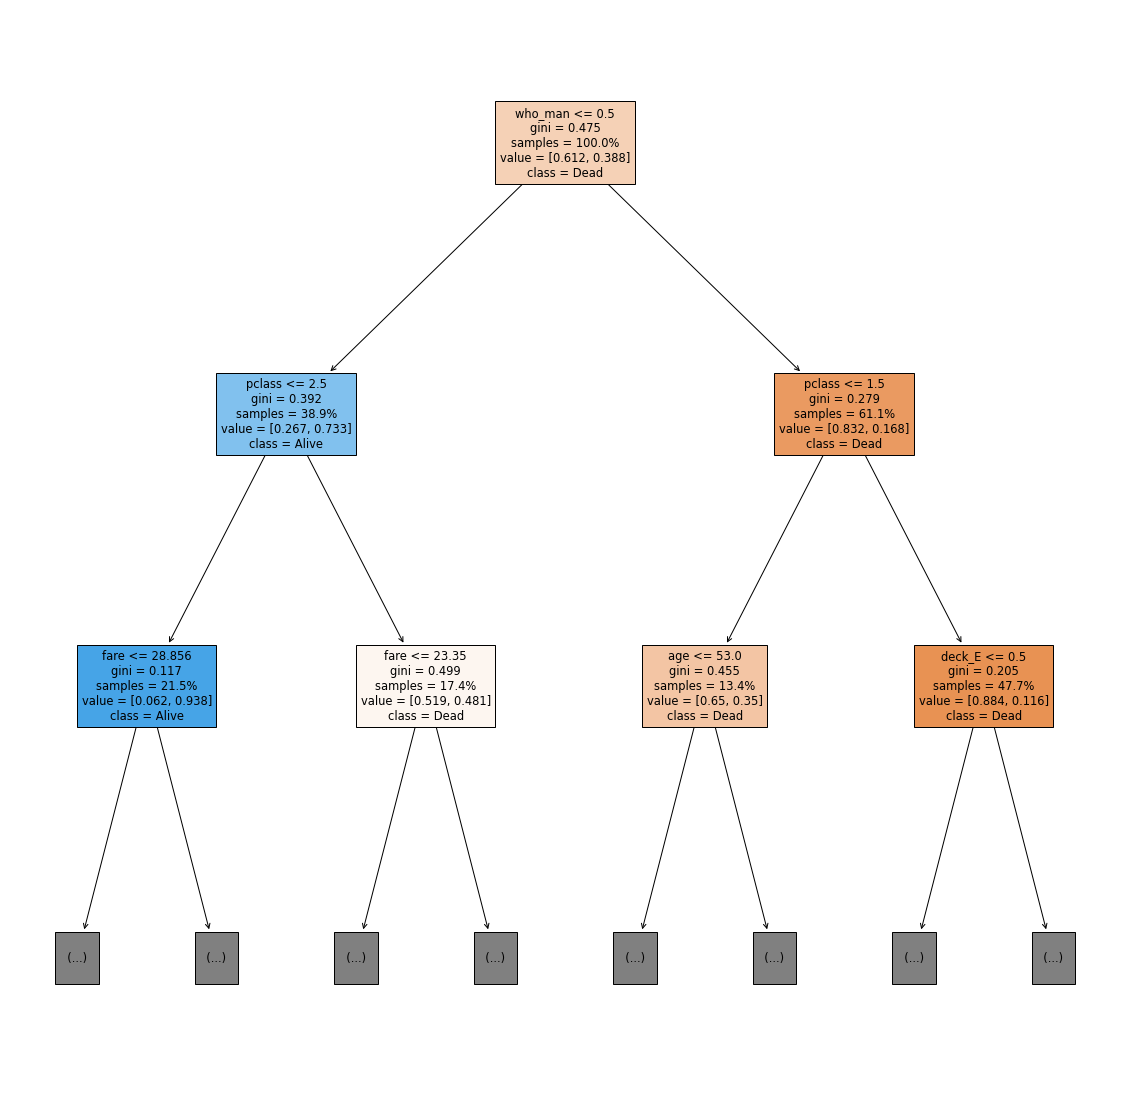

In [194]:
from sklearn import tree
import matplotlib.pyplot as plt 
plt.figure(figsize=(20,20))
tree.plot_tree(decision_tree=model, max_depth = 2, feature_names = X.columns, class_names=["Dead", "Alive"], filled=True, proportion=True)
plt.show()

## Plot feature importance
* Create dataframe consisting of dataset **column names** and **feature importances** (tree.feature_importance_ attribute)
* Plot bar plot showing the most important features first (from most important to least important)

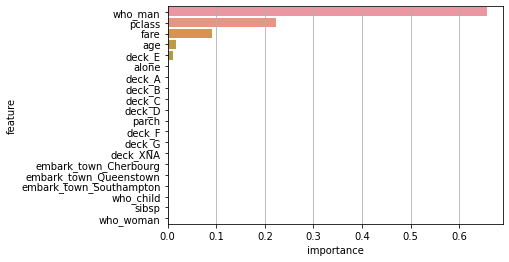

In [195]:
model.feature_importances_
df_fi = pd.DataFrame({"feature": X.columns, "importance": model.feature_importances_}).sort_values("importance", ascending=False)
sns.barplot(data=df_fi, x="importance", y = "feature")
plt.grid(axis="x")
plt.show()

## Plot ROC curve (train and test to one plot)

(sklearn.metrics.roc_curve)

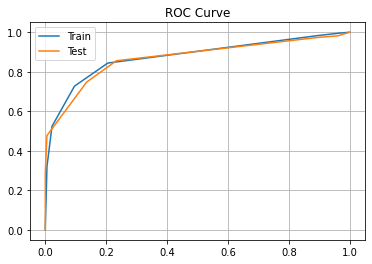

In [196]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_tr, model.predict_proba(X_tr)[:, 1], drop_intermediate=False)
plt.plot(fpr, tpr)
fpr, tpr, thresholds = roc_curve(y_ts.values, model.predict_proba(X_ts)[:, 1])
plt.plot(fpr, tpr)
plt.legend(["Train", "Test"])
plt.title("ROC Curve")
plt.grid()
plt.show()

## Bonus

1. What happens when depth of the tree is large? 
2. Plot cummulative gain chart / Plot train confusion matrix as a heatmap. (http://www2.cs.uregina.ca/~dbd/cs831/notes/lift_chart/lift_chart.html) (pd.qcut(), pd.sort_valus())
3. Try different algorithms for the task and see whether the result will be better.
4. Add event-rates to categorical plots in data exploration (= survived ratio in the category) 

In [185]:
!pip install scikit-plot

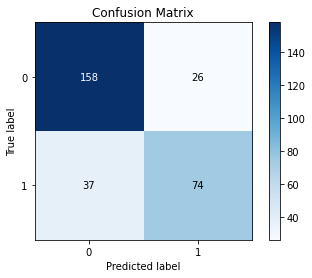

In [191]:
import scikitplot as skplt
skplt.metrics.plot_confusion_matrix(y_ts, y_ts_pred)
plt.show()

# Regression

Estimate diamond price based on its features

In [ ]:
# dataset_load
df_tips = sns.load_dataset("diamonds")
df_tips.head(10)

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
5,0.24,Very Good,J,VVS2,62.8,57.0,336,3.94,3.96,2.48
6,0.24,Very Good,I,VVS1,62.3,57.0,336,3.95,3.98,2.47
7,0.26,Very Good,H,SI1,61.9,55.0,337,4.07,4.11,2.53
8,0.22,Fair,E,VS2,65.1,61.0,337,3.87,3.78,2.49
9,0.23,Very Good,H,VS1,59.4,61.0,338,4.00,4.05,2.39


### Explore the dataset visually 

https://seaborn.pydata.org/tutorial/regression.html and/or plot distribution for each category when value is categorical/binary.

* seaborn.lmplot() for numerical columns
* seaborn.distplot() for categorical columns (or matplotlib .hist())
* plot target distribution

### Train a model and evaluate it (https://scikit-learn.org/stable/modules/model_evaluation.html#regression-metrics)

1. Binarize the categorical columns
1. Split to train/test
2. use e.g. Decision tree regressor or Linear Regression so you don't need to deal with scaling (bad practice - it is hard to estimate importance of individual features than)

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression

## Evaluate model for train and test 

* R2 (method regressor.score())
* explained_variance_score (https://scikit-learn.org/stable/modules/model_evaluation.html#regression-metrics)
* mean_absolute_error (https://scikit-learn.org/stable/modules/model_evaluation.html#regression-metrics)
* distribution plot of errors for both test and train (difference of predicted and ground truth values)

In [ ]:
from sklearn.metrics import explained_variance_score
from sklearn.metrics import mean_absolute_error